In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('trainning_data.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [22]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [35]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.000000
SalePrice      0.000000
dtype: float64

In [36]:
df.shape

(1460, 3)

In [37]:
df['GarageQual'].isnull().sum()

0

<Axes: xlabel='GarageQual'>

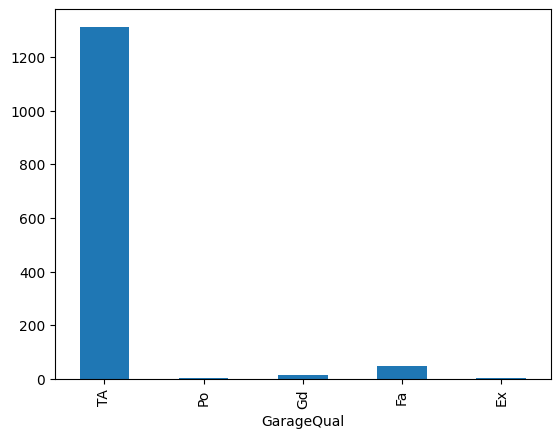

In [26]:
df['GarageQual'].value_counts().sort_index(ascending = False).plot(kind = 'bar')

In [34]:
df['GarageQual'].fillna('Missing', inplace = True)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [39]:
from sklearn.impute import SimpleImputer 

In [40]:
imputer = SimpleImputer(strategy = 'constant', fill_value = 'Missing')

In [41]:
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

In [42]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

In [45]:
X_train_imp = pd.DataFrame(X_train_imp, columns = ['FireplaceQu' , 'GarageQual'])

In [47]:
X_train_imp.isnull().sum()

FireplaceQu    0
GarageQual     0
dtype: int64

In [59]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

FireplaceQu
Missing    552
Gd         302
TA         254
Fa          27
Ex          19
Po          14
Name: count, dtype: int64

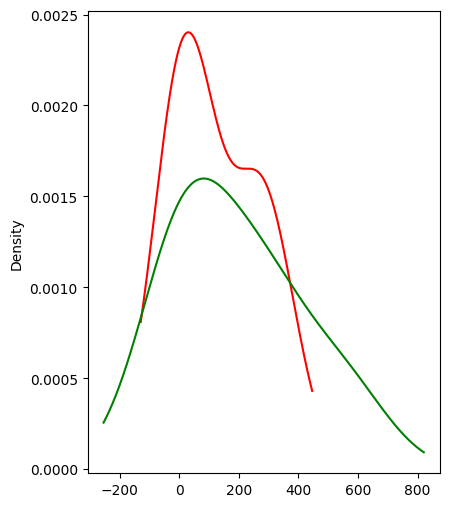

In [58]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(121)

X_train['FireplaceQu'].value_counts().plot(kind = 'kde', ax = ax , color = 'red')
X_train_imp['FireplaceQu'].value_counts().plot(kind = 'kde', ax = ax , color = 'Green')
X_train['FireplaceQu'].value_counts() , 
X_train_imp['FireplaceQu'].value_counts()
